In [123]:
%load_ext autoreload
%autoreload 2
import cv2
import os
from utils.face_analyzer import FaceAnalyzer

face_analyzer = FaceAnalyzer()
frames = face_analyzer.get_video_frames(10,20 )

I0000 00:00:1740168652.385363 1296669 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1740168652.414005 1426609 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740168652.424323 1426609 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Facial Landmarks

In [124]:


for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj= face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark

# Face

In [125]:

for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)

# Smile

In [126]:
# for frame in frames_selection:
#     frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Selected Facial Features

In [127]:
for frame in frames:
    frame.selected_facial_landmarks = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

# Head Pose

In [128]:
for frame in frames:
    frame.face_angles = face_analyzer.get_face_angles(frame.image, frame.facial_landmarks)

# Display Frames

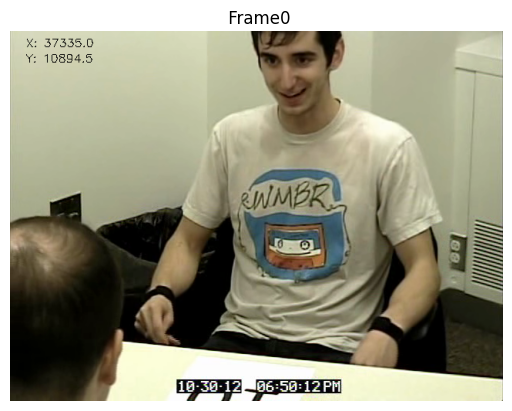

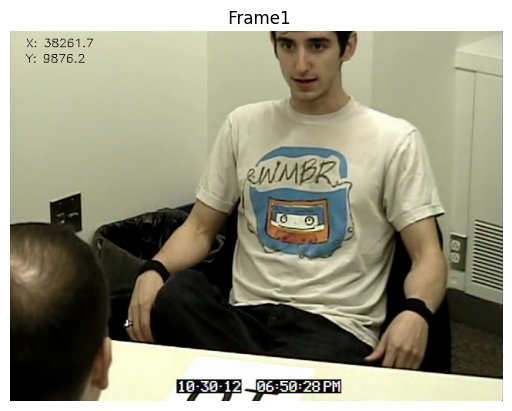

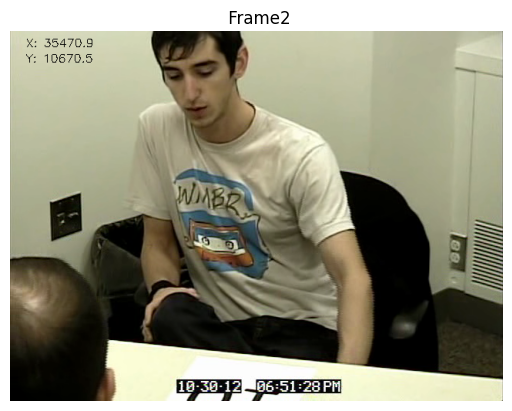

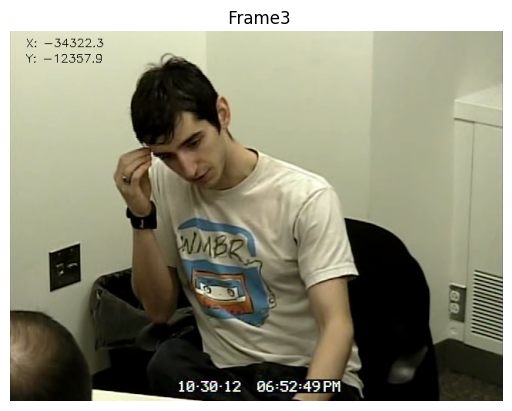

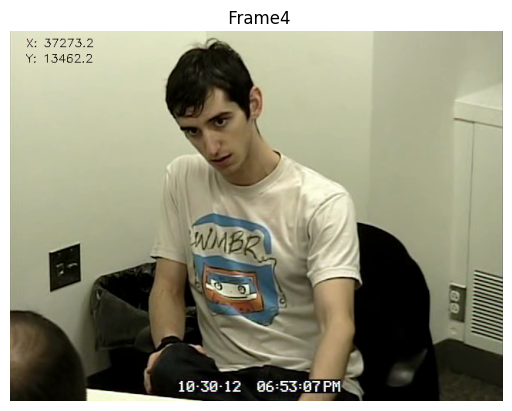

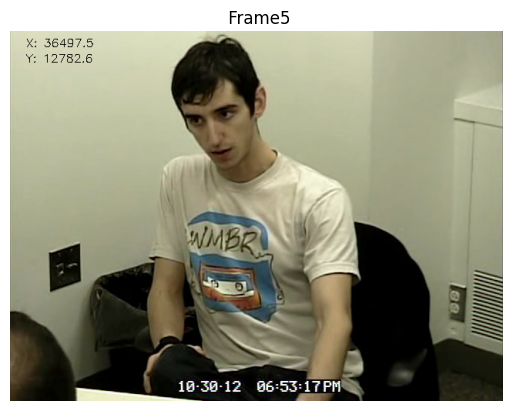

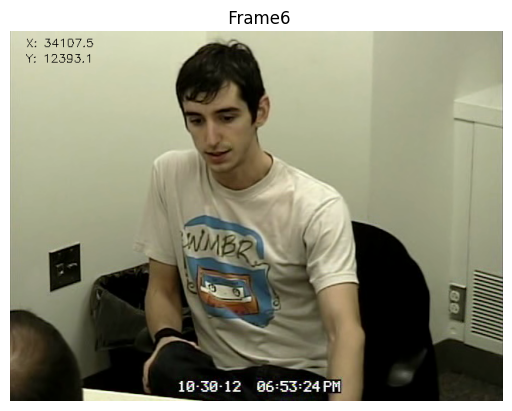

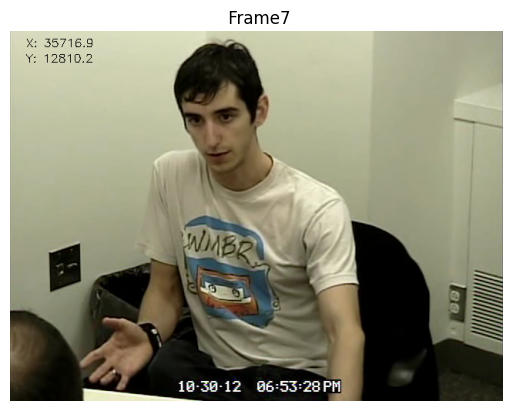

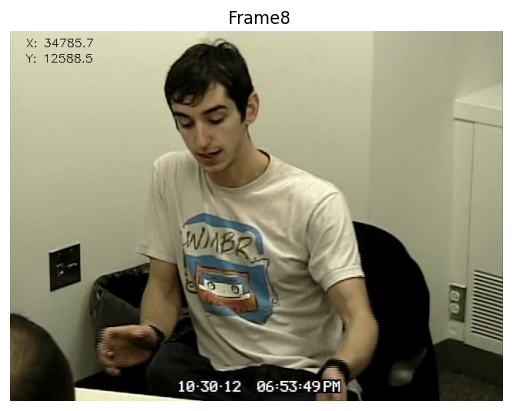

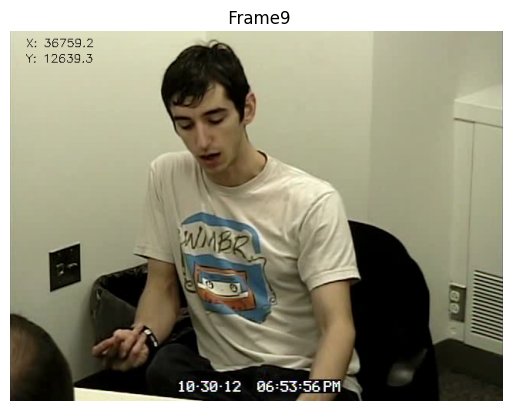

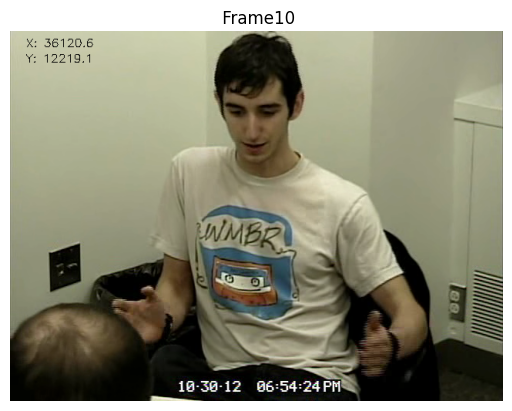

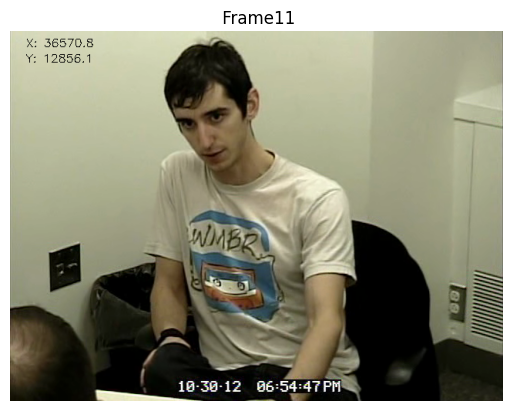

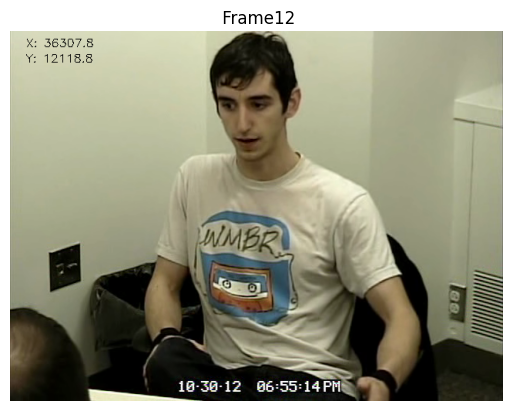

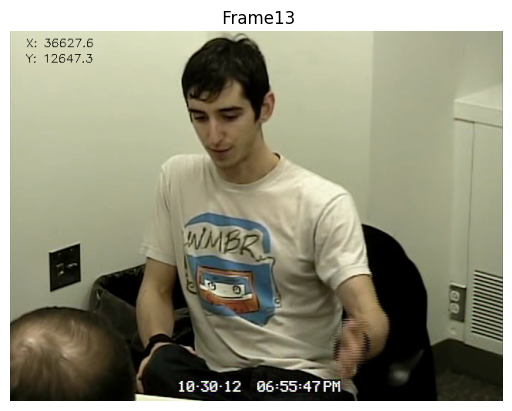

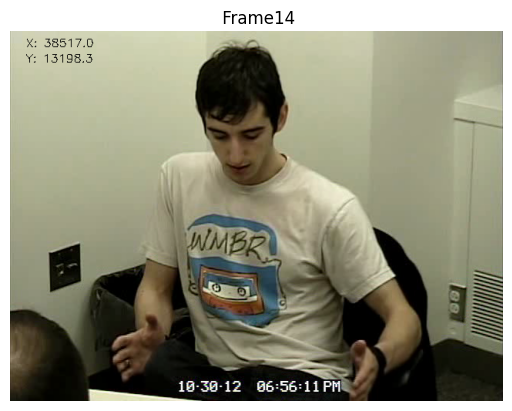

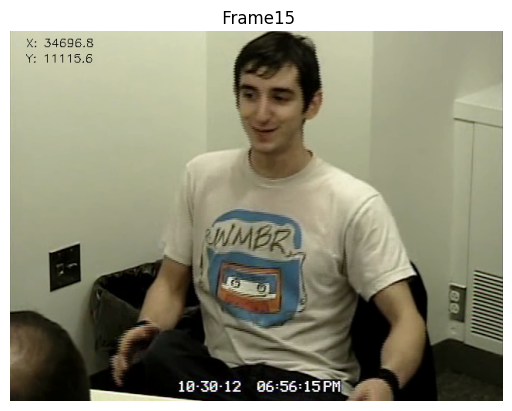

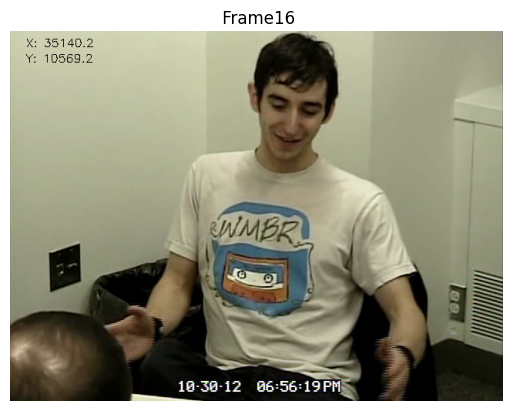

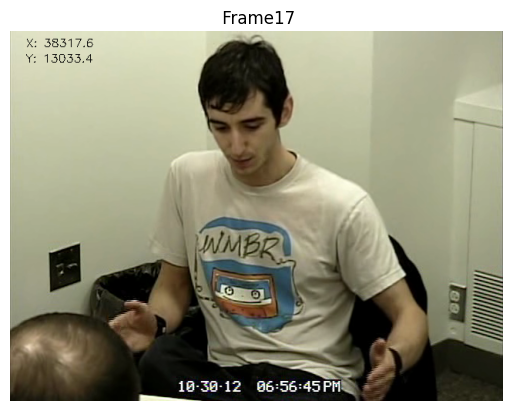

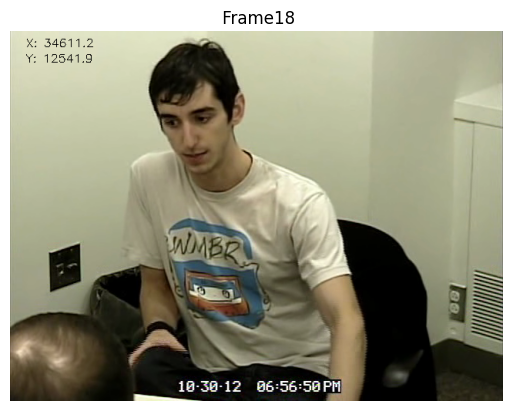

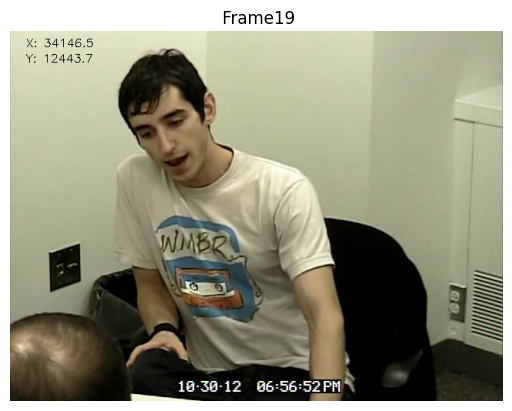

In [129]:
for frame in frames:
    frame.reset_drawable_image()
    # frame.draw_face()
    # frame.draw_smile()
    # frame.draw_selected_facial_landmarks(draw_lines=False)
    frame.put_face_angles()
    # frame.draw_facial_landmarks()
    frame.display()